# Задание 4
## TensorFlow

Попробовать улучшить точность распознования образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложить анализ с описанием того, что улучшает работу нейронной сети и что ухудшает.


### Решение
Модель улучшилась при добавления группы слоев CNN - CCN - MaxPooling (128 ядрами).

1. Помогло изменение функции активации на полносвязном слое на ELU.

2. В качестве оптимизаторов пробовал Adam и RMSProp с параметрами по умолчанию.<br>
Лучше себя показал Adam.<br>


Изменениях в скрытых слоях.

1. Для датасета с большими изображениями, думаю, нужно ещё добавить группы слоев CNN - CNN - MAxPooling и увеличить число ядер.

2. Для датасета с большим числом классов, нужно увеличить число нейронов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [6]:
from google.colab import drive
drive.mount('/content/drive')
# drive.mount('/gdrive')

Mounted at /content/drive


In [7]:
MY_DRIVE_PATH = '/content/drive/My Drive/Colab Notebooks/Computer_vision/Models'

### Загрузка и подготовка датасета CIFAR10

In [8]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

train_x = train_x.astype(np.float32) / 255
test_x = test_x.astype(np.float32) / 255

train_y = train_y.reshape(-1).astype(np.int32)
test_y = test_y.reshape(-1).astype(np.int32)

170500096/170498071 [==============================] - 4s 0us/step


In [9]:
print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000,) int32
(10000,) int32


### Визуализация датасета CIFAR10

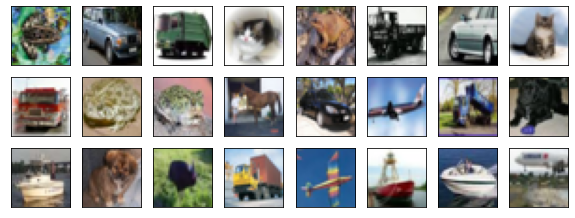

In [10]:
some_samples = train_x[200:224, ...]

fig = plt.figure(figsize=(10, 5))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j, ...])
    plt.xticks([]), plt.yticks([])
plt.show()

### Список классов

In [11]:
labels = ['Самолет', 'Автомобиль', 'Птица', 'Кот', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

y_to_label = {y: label for y, label in enumerate(labels)}

### Создание модели

In [12]:
NUM_EPOCHS = 30
BATCH_SIZE = 64
INP_SHAPE = train_x.shape[1:]

model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=INP_SHAPE),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip (RandomFlip)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation (RandomRotat (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

### Обучение

In [13]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(
        MY_DRIVE_PATH, 
        'cifar10_wghts_loss{val_loss:.2f}_acc{val_accuracy:.2f}.hdf5'), 
    save_best_only=True,
    save_weights_only=True,
    monitor='val_accuracy')

history = model.fit(
    train_x,
    train_y,
    epochs=NUM_EPOCHS,
    validation_data=(test_x, test_y),
    batch_size=BATCH_SIZE,
    callbacks=[callback])

Epoch 1/30
782/782 [==============================] - 6s 8ms/step - loss: 1.6623 - accuracy: 0.3916 - val_loss: 1.4151 - val_accuracy: 0.4896
Epoch 2/30
782/782 [==============================] - 6s 8ms/step - loss: 1.3058 - accuracy: 0.5316 - val_loss: 1.1401 - val_accuracy: 0.5928
Epoch 3/30
782/782 [==============================] - 6s 8ms/step - loss: 1.1339 - accuracy: 0.5928 - val_loss: 1.0339 - val_accuracy: 0.6373
Epoch 4/30
782/782 [==============================] - 6s 8ms/step - loss: 1.0298 - accuracy: 0.6369 - val_loss: 0.9754 - val_accuracy: 0.6663
Epoch 5/30
782/782 [==============================] - 6s 8ms/step - loss: 0.9554 - accuracy: 0.6638 - val_loss: 0.9314 - val_accuracy: 0.6818
Epoch 6/30
782/782 [==============================] - 6s 8ms/step - loss: 0.9026 - accuracy: 0.6825 - val_loss: 0.9220 - val_accuracy: 0.6850
Epoch 7/30
782/782 [==============================] - 6s 8ms/step - loss: 0.8551 - accuracy: 0.6989 - val_loss: 0.9474 - val_accuracy: 0.6805
Epoch 

### Результат обучения

Оставим веса от лучшей модели

In [15]:
model.load_weights(os.path.join(MY_DRIVE_PATH, 'cifar10_wghts_loss0.65_acc0.79.hdf5'))

In [16]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.6500 - accuracy: 0.7935


[0.6500091552734375, 0.7935000061988831]

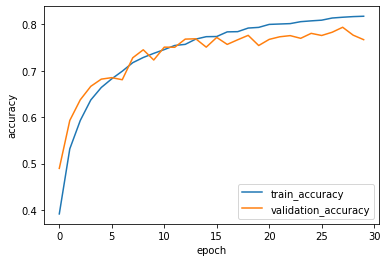

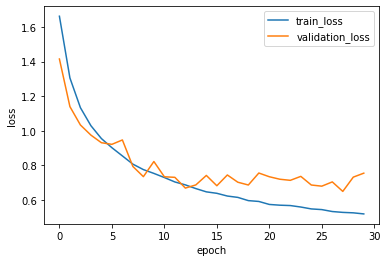

In [17]:
for metrics in ['accuracy', 'loss']:
    plt.plot(history.history[metrics])
    plt.plot(history.history[f'val_{metrics}'])
    plt.ylabel(metrics)
    plt.xlabel('epoch')
    plt.legend([f'train_{metrics}', f'validation_{metrics}'], loc='best')
    plt.show()

### Функция для отображения результата предсказания

In [18]:
def test_item(sample):

    preds = model.predict([img]).flatten()
    index = np.argmax(preds)
    pred = y_to_label[index]
    
    fig = plt.figure(figsize=(6,2))

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample[:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])

    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()
    
    print('Predicted: {}'.format(y_to_label[ans]))

### Запуск предсказания для пяти случайных изображений

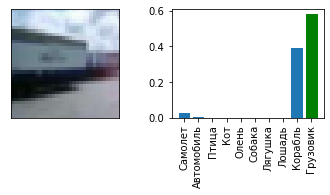

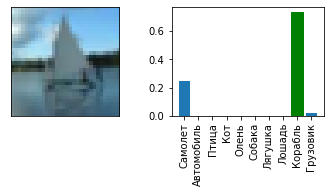

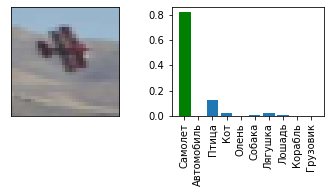

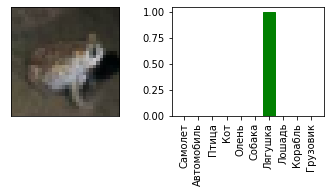

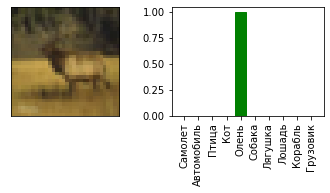

In [19]:
for _ in range(5):
    idx = np.random.choice(test_x.shape[0])
    img = test_x[idx].reshape((1, *test_x[idx].shape))

    preds = model.predict([img]).flatten()
    index = np.argmax(preds)
    pred = y_to_label[index]

    fig = plt.figure(figsize=(6,2))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(img[0])
    plt.xticks([]), plt.yticks([])

    ax2 = fig.add_subplot(1, 2, 2)
    mybar = ax2.bar(range(10), preds)
    plt.xticks(range(10), labels, rotation='vertical')
    color = 'g' if index == test_y[idx] else 'r'
    mybar[index].set_color(color)
    plt.show()